STUDENT DATA EDA & MODEL SELECTION
Reading the dataset and understanding the dataset structure

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Downloads/student_data.csv")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [2]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

(395, 33)

In [3]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [5]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [8]:
df["Medu"].value_counts()

Medu
4    131
2    103
3     99
1     59
0      3
Name: count, dtype: int64

Doing one hot encoding and categorical columns, for better insights

In [2]:
df_new = df.copy()
df_new["school"] = df["school"].map({'GP' : 0, 'MS' : 1})
df_new.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,0,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,0,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,0,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,0,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
df_new["sex"] = df["sex"].map({'M' : 0, 'F' : 1})
df_new["address"] = df["address"].map({'U' : 0, 'R' : 1})
df_new["famsize"] = df["famsize"].map({'GT3' : 0, 'LE3' : 1})
df_new["Pstatus"] = df["Pstatus"].map({'A' : 0, 'T' : 1})
df_new["schoolsup"] = df["schoolsup"].map({'no' : 0, 'yes' : 1})
df_new["famsup"] = df["famsup"].map({'no' : 0, 'yes' : 1})
df_new["paid"] = df["paid"].map({'no' : 0, 'yes' : 1})
df_new["activities"] = df["activities"].map({'no' : 0, 'yes' : 1})
df_new["nursery"] = df["nursery"].map({'no' : 0, 'yes' : 1})
df_new["higher"] = df["higher"].map({'no' : 0, 'yes' : 1})
df_new["internet"] = df["internet"].map({'no' : 0, 'yes' : 1})
df_new["romantic"] = df["romantic"].map({'no' : 0, 'yes' : 1})
df_new.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,1,18,0,0,0,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,0,1,17,0,0,1,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,0,1,15,0,1,1,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,0,1,15,0,0,1,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,0,1,16,0,0,1,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
df_new = pd.get_dummies(df_new, columns = ["Mjob", "Fjob", "reason", "guardian"], drop_first = True)
df_new.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
0,0,1,18,0,0,0,4,4,2,2,...,False,False,False,False,True,False,False,False,True,False
1,0,1,17,0,0,1,1,1,1,2,...,False,False,True,False,False,False,False,False,False,False
2,0,1,15,0,1,1,1,1,1,2,...,False,False,True,False,False,False,True,False,True,False
3,0,1,15,0,0,1,4,2,1,3,...,False,False,False,True,False,True,False,False,True,False
4,0,1,16,0,0,1,3,3,1,2,...,False,False,True,False,False,True,False,False,False,False


In [23]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   school             395 non-null    int64
 1   sex                395 non-null    int64
 2   age                395 non-null    int64
 3   address            395 non-null    int64
 4   famsize            395 non-null    int64
 5   Pstatus            395 non-null    int64
 6   Medu               395 non-null    int64
 7   Fedu               395 non-null    int64
 8   traveltime         395 non-null    int64
 9   studytime          395 non-null    int64
 10  failures           395 non-null    int64
 11  schoolsup          395 non-null    int64
 12  famsup             395 non-null    int64
 13  paid               395 non-null    int64
 14  activities         395 non-null    int64
 15  nursery            395 non-null    int64
 16  higher             395 non-null    int64
 17  internet        

Finding the relations between all columns

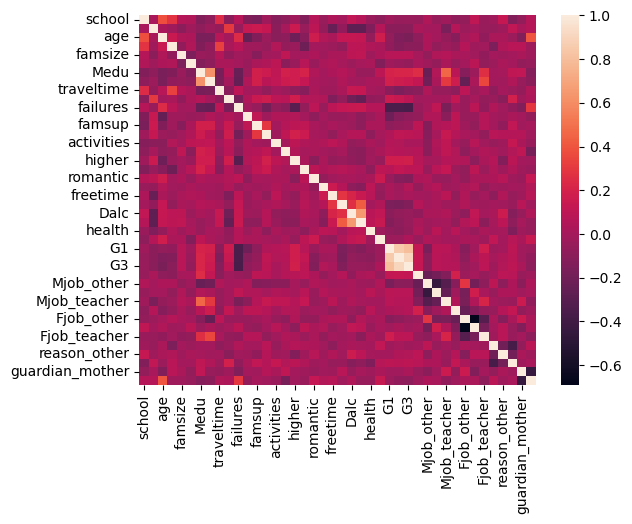

In [5]:
correlation = df_new.corr()
sns.heatmap(correlation)
plt.show()

Visualizing everything and every column with the target columns

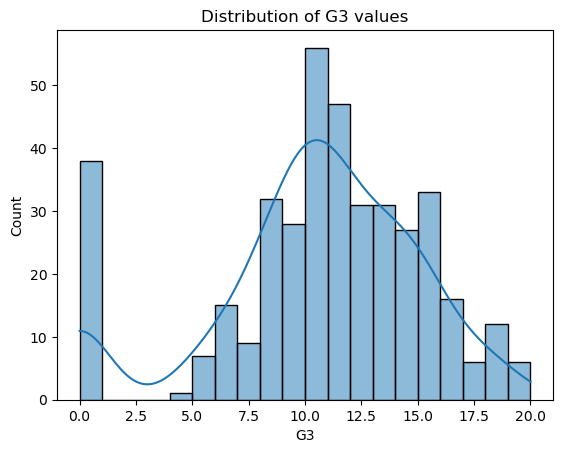

In [8]:
sns.histplot(x = "G3", bins = 20, kde = True, data = df_new)
plt.title("Distribution of G3 values")
plt.show()

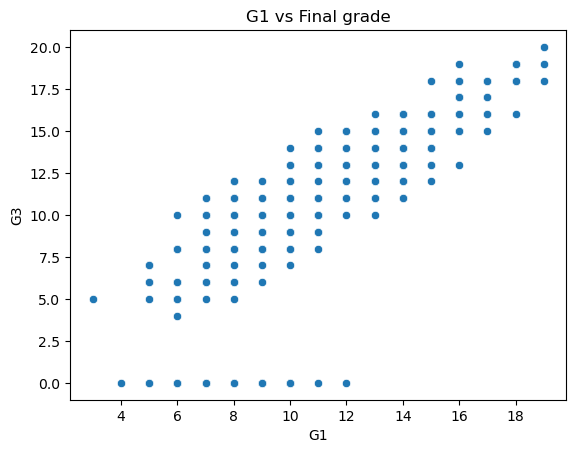

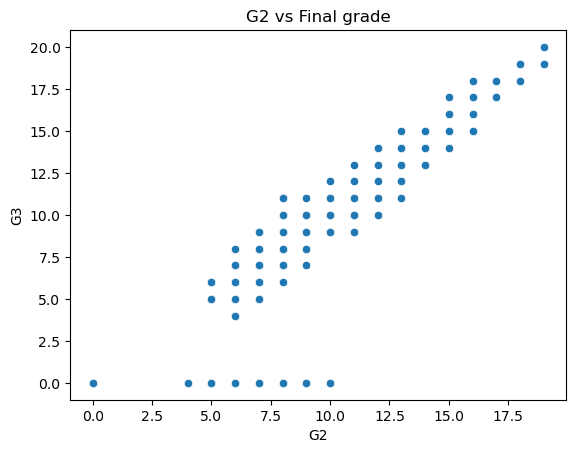

In [9]:
sns.scatterplot(x = "G1", y = "G3", data = df_new)
plt.title("G1 vs Final grade")
plt.show()

sns.scatterplot(x = "G2", y = "G3", data = df_new)
plt.title("G2 vs Final grade")
plt.show()

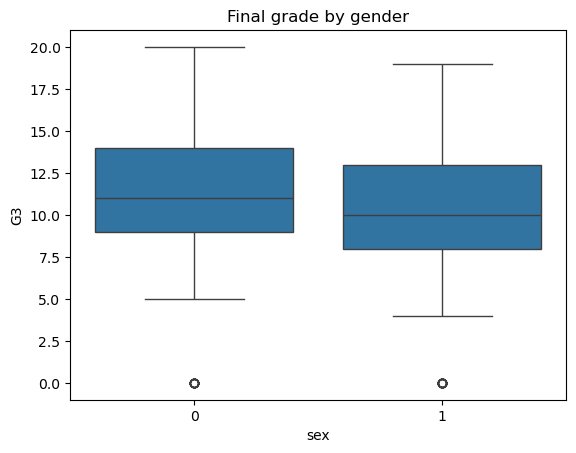

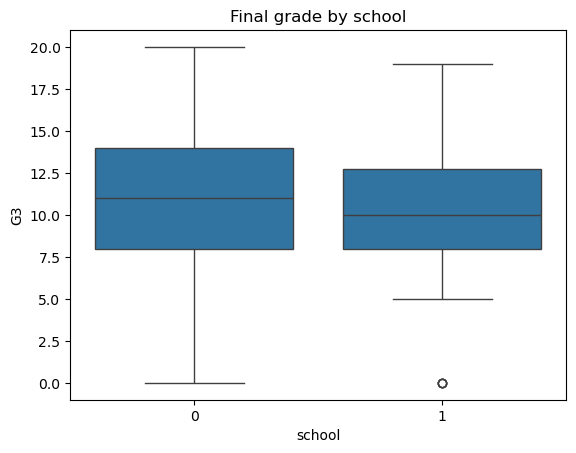

In [11]:
sns.boxplot(x = "sex", y = "G3", data = df_new)
plt.title("Final grade by gender")
plt.show()

sns.boxplot(x = "school", y = "G3", data = df_new)
plt.title("Final grade by school")
plt.show()

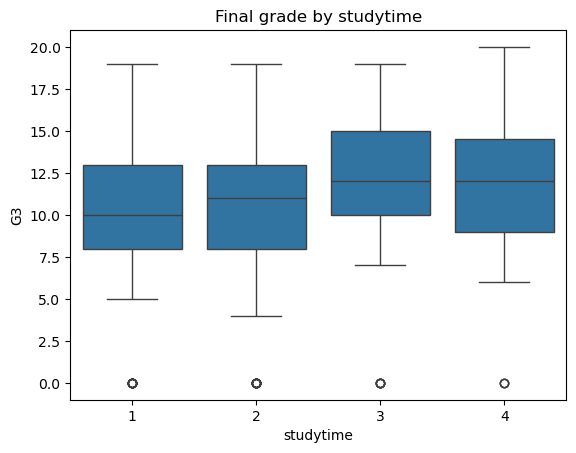

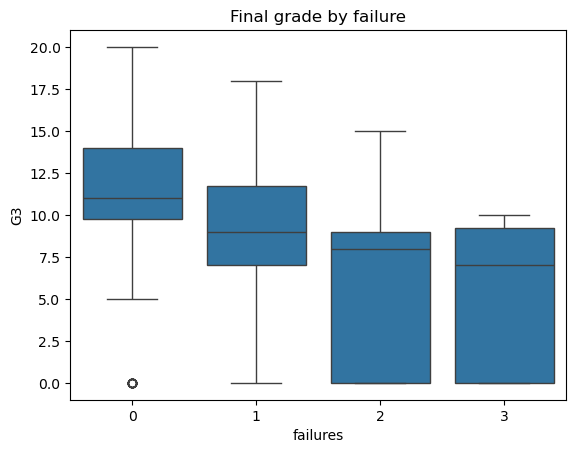

In [14]:
sns.boxplot(x = "studytime", y = "G3", data = df_new)
plt.title("Final grade by studytime")
plt.show()

sns.boxplot(x = "failures", y = "G3", data = df_new)
plt.title("Final grade by failure")
plt.show()


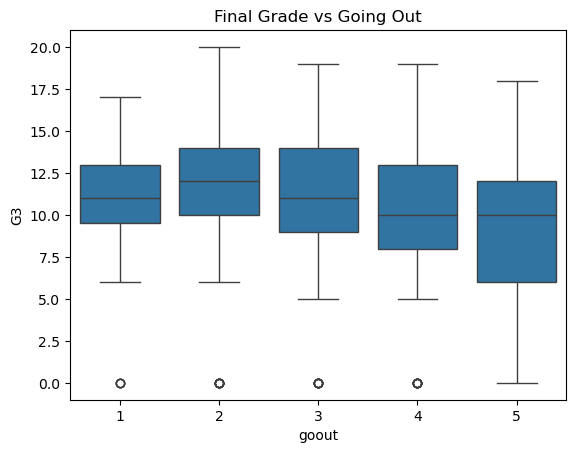

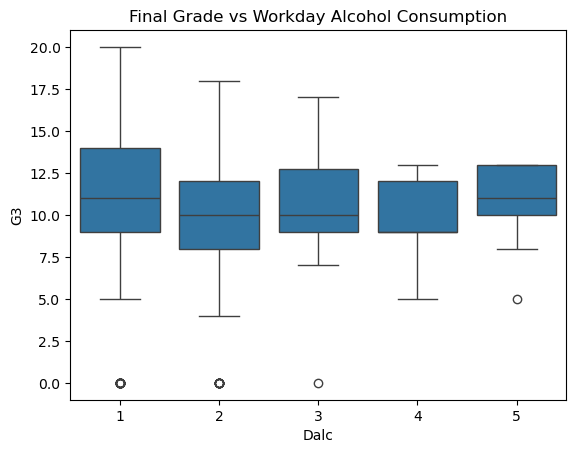

In [15]:
sns.boxplot(x='goout', y='G3', data=df_new)
plt.title("Final Grade vs Going Out")
plt.show()

sns.boxplot(x='Dalc', y='G3', data=df_new)
plt.title("Final Grade vs Workday Alcohol Consumption")
plt.show()


Training the data

In [8]:
from sklearn.model_selection import train_test_split
X = df_new.drop('G3', axis = 1)
y = df_new['G3']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("X train: ", X_train)
print("Y train: ", y_train)

X train:       school  sex  age  address  famsize  Pstatus  Medu  Fedu  traveltime  \
181       0    0   16        0        0        1     3     3           1   
194       0    0   16        0        0        1     2     3           2   
173       0    1   16        0        0        1     1     3           1   
63        0    1   16        0        0        1     4     3           1   
253       0    0   16        1        0        1     2     1           2   
..      ...  ...  ...      ...      ...      ...   ...   ...         ...   
71        0    0   15        0        0        1     4     2           1   
106       0    1   15        0        0        1     2     2           1   
270       0    1   19        0        0        1     3     3           1   
348       0    1   17        0        0        1     4     3           1   
102       0    0   15        0        0        1     4     4           1   

     studytime  ...  Mjob_teacher  Fjob_health  Fjob_other  Fjob_services  \


Linear Regressor model with r2 score: 0.7241341236974023, works well but could be better

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

model = LinearRegression()
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)

r2 = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)

print("R2 score is: ", r2)
print("MSE score is: ", mse)
print("MAE score is: ", mae)

R2 score is:  0.7241341236974023
MSE score is:  5.656642833231219
MAE score is:  1.6466656197147496


Random forest regressor with r2 score our top model 

In [19]:
from sklearn.ensemble import RandomForestRegressor

tree = RandomForestRegressor(random_state = 42, n_estimators = 50, max_depth = 2)
tree.fit(X_train, y_train)

y_test_pred_1 = tree.predict(X_test)

r2_1 = r2_score(y_test, y_test_pred_1)
mse_1 = mean_squared_error(y_test, y_test_pred_1)
mae_1 = mean_absolute_error(y_test, y_test_pred_1)

print("R2 score is: ", r2_1)
print("MSE score is: ", mse_1)
print("MAE score is: ", mae_1)

R2 score is:  0.8421386865297068
MSE score is:  3.2369536945073483
MAE score is:  1.2697825512749006


XGB works better than Linear regression but still not great

In [30]:
import xgboost as xgb

xgb = xgb.XGBRegressor(n_estimators=700, learning_rate=0.05, max_depth=6, subsample=0.8, colsample_bytree=0.8, random_state=42)
xgb.fit(X_train, y_train)

y_test_pred_2 = xgb.predict(X_test)

r2_2 = r2_score(y_test, y_test_pred_2)
mse_2 = mean_squared_error(y_test, y_test_pred_2)
mae_2 = mean_absolute_error(y_test, y_test_pred_2)

print("R2 score is: ", r2_2)
print("MSE score is: ", mse_2)
print("MAE score is: ", mae_2)

R2 score is:  0.7857635617256165
MSE score is:  4.392928314967868
MAE score is:  1.2476886771147764


Random Forest achieved an average cross-validated R² of 0.78 ± 0.07

In [31]:
from sklearn.model_selection import cross_val_score

cvs = cross_val_score(tree, X, y, cv = 5, scoring = 'r2')
print("Cross-validated R2 scores:", cvs)
print("Mean R2:", np.mean(cvs))
print("Std deviation:", np.std(cvs))

Cross-validated R2 scores: [0.6483345  0.83705756 0.84367656 0.77448465 0.7758792 ]
Mean R2: 0.7758864916800141
Std deviation: 0.07015535423989692


Random Forest Regressor is at moment the one and only best model for the dataset this small